# Feed-forward сети

Итак, давайте потренируемся тренировать нейронные сети прямого распространения (так как делали на паре)
При этом попробуем создать свою функцию активации на одном из слоев

In [1]:
# Сделаем необходимые импорты

import torch
import numpy as np
from torch import nn
import torchvision
import torch.nn.functional as F
from torch import optim
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from torch.nn.parameter import Parameter

In [2]:
# Загрузим датасет CIFAR-100, сразу же создадим dataloader для него
# Если вам не хватает вычислительных ресурсов, то можно вернуться к CIFAR-10

train_dataset = torchvision.datasets.CIFAR10(root='./data',
                                             train=True,  
                                             transform=transforms.ToTensor(), 
                                             download=True)


train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=32, 
                                           shuffle=True)

Files already downloaded and verified


In [3]:
test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transforms.ToTensor())
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=8,
                                         shuffle=False)

Files already downloaded and verified


In [4]:
classes = train_dataset.classes

In [5]:
# Создайте собственную архитектуру! Можете использовать все, что угодно, 
# но в ограничении на использование линейные слои (пока без сверток)
# Давайте добавим ограниченный Leaky_relu, то есть output = max(0.1x, 0.5x)
# Ваша задача добавить его в архитектуру сети как функцию активации

class Net(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super().__init__()
        self.fc1 = nn.Linear(input_dim, 8 * hidden_dim)
        self.fc2 = nn.Linear(8 * hidden_dim, 4 * hidden_dim)
        self.fc3 = nn.Linear(4 * hidden_dim, 2 * hidden_dim)
        self.fc4 = nn.Linear(2 * hidden_dim, hidden_dim)
        self.fc5 = nn.Linear(hidden_dim, output_dim)
    
    def __lrelu(self, x, low=0.1, high=0.5):
      return torch.max(x * low, x * high)

    def forward(self, x):
        x = x.view(x.shape[0], -1)
        x = self.fc1(x)
        x = F.leaky_relu(x, 0.01)
        x = self.fc2(x)
        x = F.leaky_relu(x, 0.01)
        x = self.fc3(x)
        x = F.leaky_relu(x, 0.01)
        x = self.fc4(x)
        x = self.__lrelu(x) # ограниченный LeakyReLU
        x = self.fc5(x)
        return x

    def predict(self, x):
        x = self.forward(x)
        x = F.softmax(x)
        return x

In [6]:
net = Net(32*32*3, 128, 10)

In [7]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.005, momentum=0.9)

In [8]:
# Запустить обучение (по аналогии с тем, что делали на паре)

net.train()

from tqdm import tqdm
for epoch in tqdm(range(20)):  
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data[0], data[1]

        # обнуляем градиент
        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # выводим статистику о процессе обучения
        running_loss += loss.item()
        if i % 300 == 0:    # печатаем каждые 300 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Training is finished!')

  0%|          | 0/20 [00:00<?, ?it/s]

[1,     1] loss: 0.001
[1,   301] loss: 0.345
[1,   601] loss: 0.335
[1,   901] loss: 0.311
[1,  1201] loss: 0.299
[1,  1501] loss: 0.290


  5%|▌         | 1/20 [01:04<20:20, 64.24s/it]

[2,     1] loss: 0.001
[2,   301] loss: 0.280
[2,   601] loss: 0.278
[2,   901] loss: 0.270
[2,  1201] loss: 0.269
[2,  1501] loss: 0.263


 10%|█         | 2/20 [02:01<18:03, 60.17s/it]

[3,     1] loss: 0.001
[3,   301] loss: 0.257
[3,   601] loss: 0.257
[3,   901] loss: 0.254
[3,  1201] loss: 0.250
[3,  1501] loss: 0.248


 15%|█▌        | 3/20 [02:58<16:37, 58.67s/it]

[4,     1] loss: 0.001
[4,   301] loss: 0.243
[4,   601] loss: 0.241
[4,   901] loss: 0.242
[4,  1201] loss: 0.239
[4,  1501] loss: 0.237


 20%|██        | 4/20 [03:55<15:25, 57.84s/it]

[5,     1] loss: 0.001
[5,   301] loss: 0.232
[5,   601] loss: 0.229
[5,   901] loss: 0.231
[5,  1201] loss: 0.231
[5,  1501] loss: 0.229


 25%|██▌       | 5/20 [04:51<14:21, 57.42s/it]

[6,     1] loss: 0.001
[6,   301] loss: 0.223
[6,   601] loss: 0.225
[6,   901] loss: 0.223
[6,  1201] loss: 0.222
[6,  1501] loss: 0.221


 30%|███       | 6/20 [05:48<13:19, 57.12s/it]

[7,     1] loss: 0.001
[7,   301] loss: 0.219
[7,   601] loss: 0.217
[7,   901] loss: 0.218
[7,  1201] loss: 0.213
[7,  1501] loss: 0.217


 35%|███▌      | 7/20 [06:44<12:20, 56.95s/it]

[8,     1] loss: 0.001
[8,   301] loss: 0.209
[8,   601] loss: 0.210
[8,   901] loss: 0.212
[8,  1201] loss: 0.210
[8,  1501] loss: 0.213


 40%|████      | 8/20 [07:40<11:18, 56.56s/it]

[9,     1] loss: 0.001
[9,   301] loss: 0.205
[9,   601] loss: 0.204
[9,   901] loss: 0.204
[9,  1201] loss: 0.205
[9,  1501] loss: 0.205


 45%|████▌     | 9/20 [08:36<10:20, 56.43s/it]

[10,     1] loss: 0.001
[10,   301] loss: 0.196
[10,   601] loss: 0.198
[10,   901] loss: 0.201
[10,  1201] loss: 0.202
[10,  1501] loss: 0.200


 50%|█████     | 10/20 [09:32<09:23, 56.33s/it]

[11,     1] loss: 0.001
[11,   301] loss: 0.193
[11,   601] loss: 0.193
[11,   901] loss: 0.194
[11,  1201] loss: 0.195
[11,  1501] loss: 0.199


 55%|█████▌    | 11/20 [10:28<08:24, 56.06s/it]

[12,     1] loss: 0.001
[12,   301] loss: 0.188
[12,   601] loss: 0.189
[12,   901] loss: 0.193
[12,  1201] loss: 0.191
[12,  1501] loss: 0.191


 60%|██████    | 12/20 [11:27<07:35, 56.96s/it]

[13,     1] loss: 0.001
[13,   301] loss: 0.187
[13,   601] loss: 0.186
[13,   901] loss: 0.185
[13,  1201] loss: 0.185
[13,  1501] loss: 0.188


 65%|██████▌   | 13/20 [12:23<06:37, 56.83s/it]

[14,     1] loss: 0.001
[14,   301] loss: 0.179
[14,   601] loss: 0.182
[14,   901] loss: 0.178
[14,  1201] loss: 0.183
[14,  1501] loss: 0.183


 70%|███████   | 14/20 [13:20<05:39, 56.64s/it]

[15,     1] loss: 0.000
[15,   301] loss: 0.175
[15,   601] loss: 0.173
[15,   901] loss: 0.175
[15,  1201] loss: 0.180
[15,  1501] loss: 0.179


 75%|███████▌  | 15/20 [14:16<04:42, 56.52s/it]

[16,     1] loss: 0.000
[16,   301] loss: 0.171
[16,   601] loss: 0.170
[16,   901] loss: 0.174
[16,  1201] loss: 0.173
[16,  1501] loss: 0.173


 80%|████████  | 16/20 [15:13<03:46, 56.65s/it]

[17,     1] loss: 0.001
[17,   301] loss: 0.168
[17,   601] loss: 0.171
[17,   901] loss: 0.168
[17,  1201] loss: 0.168
[17,  1501] loss: 0.168


 85%|████████▌ | 17/20 [16:10<02:50, 56.74s/it]

[18,     1] loss: 0.001
[18,   301] loss: 0.159
[18,   601] loss: 0.163
[18,   901] loss: 0.164
[18,  1201] loss: 0.167
[18,  1501] loss: 0.166


 90%|█████████ | 18/20 [17:06<01:53, 56.63s/it]

[19,     1] loss: 0.001
[19,   301] loss: 0.157
[19,   601] loss: 0.158
[19,   901] loss: 0.161
[19,  1201] loss: 0.161
[19,  1501] loss: 0.162


 95%|█████████▌| 19/20 [18:02<00:56, 56.44s/it]

[20,     1] loss: 0.001
[20,   301] loss: 0.150
[20,   601] loss: 0.153
[20,   901] loss: 0.157
[20,  1201] loss: 0.155
[20,  1501] loss: 0.158


100%|██████████| 20/20 [18:59<00:00, 56.96s/it]

Training is finished!


In [9]:
data_iter = iter(test_loader)
images, labels = next(data_iter)

true classes:  cat ship ship airplane frog frog automobile frog


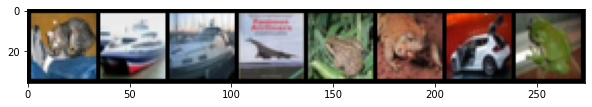

In [10]:
net.eval()
outputs = net(images)
imgs = torchvision.utils.make_grid(images)
plt.figure(figsize=(10, 5))
plt.imshow(imgs.permute(1, 2, 0).numpy())
tc = np.array([classes[labels[i]] for i in range(len(labels))])
print("true classes: ", " ".join(tc))

In [11]:
net.predict(images)

<ipython-input-5-1330fde6c07a>:33: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(x)


tensor([[7.4273e-02, 3.5220e-02, 1.8504e-02, 3.1031e-01, 2.8522e-01, 7.9389e-02,
         4.3596e-03, 6.6850e-03, 1.7880e-01, 7.2387e-03],
        [5.3508e-02, 5.0718e-02, 2.3309e-03, 1.9815e-04, 8.4937e-04, 6.2562e-05,
         1.0059e-04, 6.0345e-04, 8.4539e-01, 4.6244e-02],
        [1.6738e-01, 1.3298e-01, 5.2032e-03, 9.5009e-04, 3.1788e-03, 4.7451e-04,
         2.5783e-04, 1.0465e-02, 5.5424e-01, 1.2488e-01],
        [9.2839e-02, 2.9571e-02, 9.5227e-02, 3.8036e-02, 3.8490e-01, 9.1682e-03,
         3.0897e-03, 1.9195e-02, 3.1895e-01, 9.0296e-03],
        [1.6198e-04, 1.8294e-05, 4.0365e-02, 3.9783e-02, 3.1654e-01, 3.1188e-02,
         5.6948e-01, 4.3707e-04, 1.9772e-03, 5.3458e-05],
        [3.0759e-03, 1.5317e-04, 8.2707e-02, 2.2421e-01, 4.1510e-02, 1.3675e-01,
         4.9201e-01, 1.8126e-02, 3.1572e-04, 1.1473e-03],
        [6.6695e-03, 7.6681e-01, 1.0397e-02, 1.4153e-01, 7.0932e-05, 3.5290e-02,
         3.1562e-03, 9.5083e-03, 4.4795e-03, 2.2091e-02],
        [8.9818e-04, 7.3513

In [12]:
_, predicted = torch.max(outputs, 1)
predicted

tensor([3, 8, 8, 4, 6, 6, 1, 6])

In [13]:
pc = np.array([classes[predicted[i]] for i in range(len(labels))])
print("predicted classes: ", " ".join(pc))

predicted classes:  cat ship ship deer frog frog automobile frog


In [14]:
print(f'Accuracy = {(tc == pc).sum() / len(tc)}')

Accuracy = 0.875


true classes:  cat automobile airplane truck dog horse truck ship


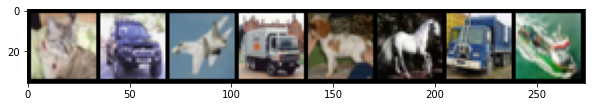

In [15]:
images, labels = next(data_iter)
outputs = net(images)
imgs = torchvision.utils.make_grid(images)
plt.figure(figsize=(10, 5))
plt.imshow(imgs.permute(1, 2, 0).numpy())
tc = np.array([classes[labels[i]] for i in range(len(labels))])
print("true classes: ", " ".join(tc))

In [16]:
net.predict(images)
_, predicted = torch.max(outputs, 1)
predicted

<ipython-input-5-1330fde6c07a>:33: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(x)


tensor([3, 1, 0, 9, 5, 7, 9, 8])

In [17]:
pc = np.array([classes[predicted[i]] for i in range(len(labels))])
print("predicted classes: ", " ".join(pc))
print(f'Accuracy = {(tc == pc).sum() / len(tc)}')

predicted classes:  cat automobile airplane truck dog horse truck ship
Accuracy = 1.0


true classes:  horse frog truck ship airplane cat ship ship


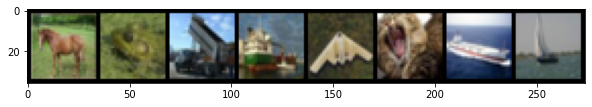

In [31]:
images, labels = next(data_iter)
outputs = net(images)
imgs = torchvision.utils.make_grid(images)
plt.figure(figsize=(10, 5))
plt.imshow(imgs.permute(1, 2, 0).numpy())
tc = np.array([classes[labels[i]] for i in range(len(labels))])
print("true classes: ", " ".join(tc))

In [32]:
net.predict(images)
_, predicted = torch.max(outputs, 1)
predicted

<ipython-input-5-1330fde6c07a>:33: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(x)


tensor([7, 6, 9, 8, 6, 3, 8, 8])

In [33]:
pc = np.array([classes[predicted[i]] for i in range(len(labels))])
print("predicted classes: ", " ".join(pc))
print(f'Accuracy = {(tc == pc).sum() / len(tc)}')

predicted classes:  horse frog truck ship frog cat ship ship
Accuracy = 0.875
